# Mutual fund returns

### Project Overview

The data given is of the mutual funds in USA. The objective of this problem is to predict the ‘basis point spread’ over AAA bonds i.e. feature ‘bonds_aaa’ against each Serial Number.

Basis Point Spread indicates the additional return a mutual fund would give over the AAA rated bonds.

#### Features:
- Fund Symbol: Uniques symbol for the mutual fund used for representing it on the bourses
- Fund Name: Full name of the mutual fund scheme
- Category: Investment category of the mutual fund
- Fund Family: Asset management company to which mutual fund belongs to
- Investment: Type of investment of the mutual fund scheme
- Size: Size of the mutual fund based on the total net assets
- Total net assets: Total assets under management for the mutual fund scheme
- Currency: Currency in which the investments of the mutual fund are held
- Net Annual Expense Ratio: Expense ratio is the fee that the asset management company charges to the clients as a percentage of the total assets.
- Morningstar Rating: This is the overall fund rating given by the rating agency Morning Star. The rating is on the scale of 1 to 5 where 5 is the best.
- Inception Date: The date on which the mutual fund scheme was started.
- portfolio: percentage of total assets invested in the investment instrument.
- sectors: percentage of equity assets invested in the sector
- Morningstar Return Rating: Fund rating based on returns by the rating agency Morning Star.The rating is on the scale of 1 to 5 where 5 is the best. Returns_ytd: Year to date return of the mutual fund.
- returns: Annual return of the mutual fund for the respective year
- Morningstar Risk Rating: Fund rating based on risk of the mutual fund by the rating agency Morning Star.The rating is on the scale of 1 to 5 where 5 is the best.
- Alpha 3y: 3year average alpha of the mutual fund.
- Beta 3y: 3year average beta of the mutual fund.
- Mean Annual Return 3y: 3year mean annual return
- Standard Deviation 3y: Standard deviation of returns over three years.
- Sharpe Ratio 3y: 3year average Sharpe ratio of the mutual fund.
- bonds_*: Basis point spread over the bonds for the mutual fund.

The original data contains many non numerical features and missing values. We will be learning how to handle these cases in future concepts, for this project we have processed the data for you so that you can concentrate on building model.

#### Target:
- **bonds_**

#### Objective:
The objective of this problem is to predict the ‘basis point spread’ over AAA bonds i.e. feature ‘bonds_aaa’ against each Serial Number.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mutualfunds-GP.csv')

In [3]:
data.head()

,Serial Number,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,3935,284820000,1.55,3,6.97,14.80,77.25,0.97,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00
1,13836,71810000,1.45,2,10.84,29.59,58.51,0.94,0.01,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.54
2,8956,6880000000,0.94,4,0.78,99.22,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
3,9142,399430000,1.00,2,0.51,99.49,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
4,5796,656280000,2.69,4,7.78,23.60,68.49,0.11,0.00,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00


In [4]:
data.shape

(11898, 153)

In [5]:
data.describe()

,Serial Number,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
count,11898.000000,1.189800e+04,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,...,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000
mean,8886.317196,2.428921e+09,1.019386,2.745503,6.869599,59.288643,30.404463,1.567409,0.368650,0.632453,...,0.001933,0.000252,0.019919,0.011094,0.034712,0.006640,0.469827,0.261809,0.268364,12.442643
std,5130.876028,1.018769e+10,0.615437,1.361566,11.777783,42.114027,38.794591,6.375753,2.435118,5.239956,...,0.043926,0.015878,0.139729,0.104748,0.183056,0.081217,0.499110,0.439638,0.443127,23.614576
min,2.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.600000
25%,4414.250000,7.008000e+07,0.620000,2.000000,1.130000,0.490000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8910.500000,3.261300e+08,0.960000,3.000000,2.960000,83.225000,1.420000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13325.750000,1.380000e+09,1.360000,4.000000,6.690000,97.450000,66.560000,0.870000,0.020000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.935000
max,17773.000000,1.880000e+11,14.530000,5.000000,100.000000,100.000000,100.000000,94.710000,71.420000,93.820000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.790000


In [6]:
data.drop('Serial Number',1,inplace=True)

In [7]:
data.shape

(11898, 152)

#### Hypothesis testing: chi2 

Another thing bank suspects is that there is a strong assosciation between morningstar return rating and morningstar risk rating. Now let's check it by using null hypothesis. Since both are categorical columns, we will do chi-square test to test the same

- Null Hypothesis : Both the features are independent from each other.
- Alternative Hypothesis : Both features are dependent on each other.

In [8]:
from scipy.stats import chi2_contingency
import scipy.stats as stats

critical_value = stats.chi2.ppf(q=0.95, df = 11)

return_rating = data['morningstar_return_rating'].value_counts()

risk_rating = data['morningstar_risk_rating'].value_counts()

In [9]:
observed = pd.concat([return_rating.transpose(),risk_rating.transpose()],axis=1,keys=['return','risk'])

chi2, p, dof, ex = chi2_contingency(observed)

print('Chi2 value:',chi2)
print('p-value:',p)
print('Degree of freedom:',dof)
print('ex value:',ex)
print('Critical value:',critical_value)

Chi2 value: 28.75585318206671
p-value: 2.5889934498733718e-05
Degree of freedom: 5
ex value: [[3868.5 3868.5]
 [2621.  2621. ]
 [2320.  2320. ]
 [1236.  1236. ]
 [1018.  1018. ]
 [ 834.5  834.5]]
Critical value: 19.67513757268249


### We see that p_value is very less. So we reject the null hypothesis.

In [10]:
if chi2 > critical_value:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Reject Null Hypothesis


In [11]:
#Removing correlated features

import seaborn as sns

correlation = abs(data.corr())

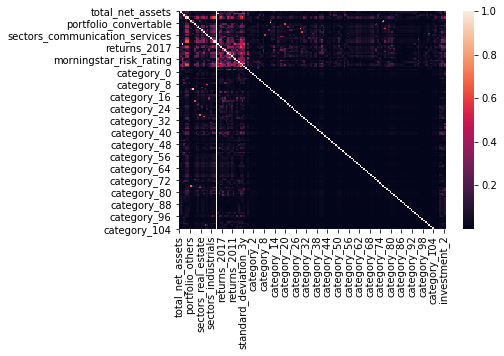

In [12]:
sns.heatmap(correlation)

In [13]:
us_correlation = correlation.unstack().sort_values(ascending=False)

In [14]:
max_correlated = us_correlation[(us_correlation>0.75) & (us_correlation<1)]
print(max_correlated)

morningstar_return_rating  morningstar_rating           0.963584
morningstar_rating         morningstar_return_rating    0.963584
portfolio_bonds            portfolio_stocks             0.917733
portfolio_stocks           portfolio_bonds              0.917733
category_12                portfolio_convertable        0.892575
portfolio_convertable      category_12                  0.892575
sharpe_ratio_3y            mean_annual_return_3y        0.769218
mean_annual_return_3y      sharpe_ratio_3y              0.769218
dtype: float64


In [15]:
data.drop(['morningstar_rating','portfolio_stocks','category_12','sharpe_ratio_3y'],1,inplace=True)

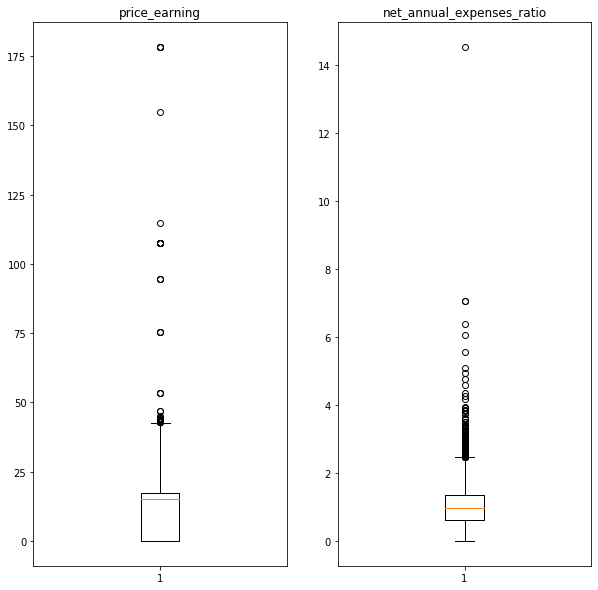

In [16]:
#Outlier detection

fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(10,10))

ax_1.boxplot(data['price_earning'])
ax_1.set_title('price_earning')

ax_2.boxplot(data['net_annual_expenses_ratio'])
ax_2.set_title('net_annual_expenses_ratio')
plt.show()


In [17]:
#Predictor check

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

X = data.drop('bonds_aaa',1)
y = data['bonds_aaa']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=3)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('RMSE:',rmse)

r2_score = r2_score(y_test,y_pred)
print('R2:',r2_score)

RMSE: 15.729889666850179
R2: 0.5508368813852407


Regularization is a technique used to prevent overfitting in datasets. Sometime complex model may not perform well in test data due to over fitting. We need to choose the right model in between simple and complex model. Regularization helps to choose preferred model complexity, so that model is better at predicting.

Now in this task let's predict the bonds_aaa using lasso regressor and ridge regressor with the help of gridsearch cv , check is there any improvement in the prediction.

In [20]:
#Regularization

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso

ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

ridge_model = Ridge()

ridge_grid = GridSearchCV(estimator=ridge_model, param_grid = dict(alpha=ridge_lambdas))
ridge_grid.fit(X_train, y_train)
ridge_pred = ridge_grid.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_pred))
print('Ridge RMSE:',ridge_rmse)

C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.58984e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.39801e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41106e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.46119e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.52476e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\lin

C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.05028e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.24375e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.12211e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.76384e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.18901e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\lin

Ridge RMSE: 15.716203398176285


C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.0292e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.0969e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.32181e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.06754e-26): result may not be accurate.
  overwrite_a=True).T


In [21]:
lasso_model = Lasso()

lasso_grid = GridSearchCV(estimator=lasso_model, param_grid = dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train, y_train)
lasso_pred = lasso_grid.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_pred))
print('Lasso RMSE:',lasso_rmse)

C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 808288.0119996367, tolerance: 376.31566221139747
  positive)
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781070.6820941417, tolerance: 367.3503798249367
  positive)
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789512.5622000186, tolerance: 373.4312752203001
  positive)
C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

Lasso RMSE: 15.719153628852961


C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 996388.4653443004, tolerance: 466.75317533520575
  positive)


In [22]:
if ridge_rmse < lasso_rmse:
    print('Select Ridge model as it has a lower RMSE value:',ridge_rmse)
else:
    print('Select Lasso model as it has a lower RMSE value:',lasso_rmse)

Select Ridge model as it has a lower RMSE value: 15.716203398176285
